<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [1]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [ ]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0
                )
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 1 to 112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    112 non-null    int64
 1   count   112 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

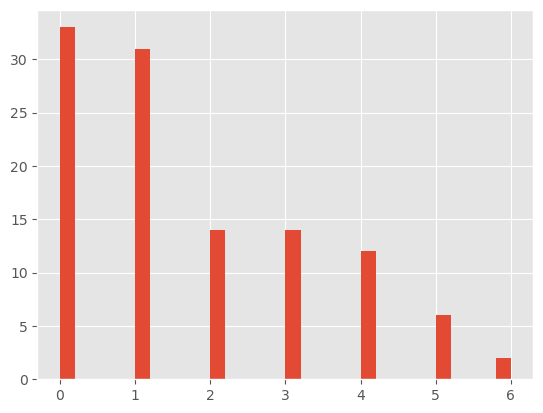

In [7]:
df['count'].hist(bins=30);

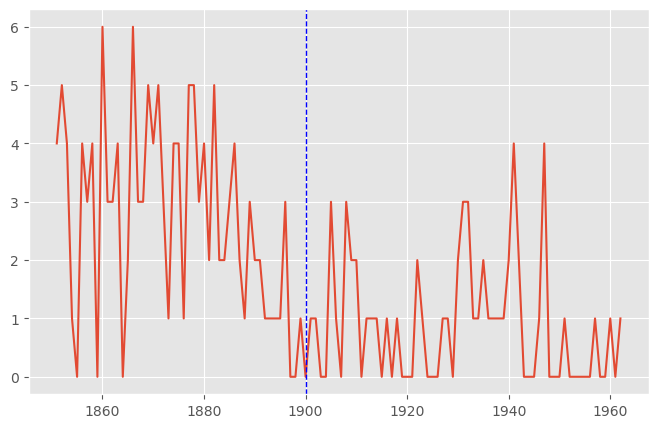

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(df.year, df['count'])
ax.axvline(x=1900, color='b', linestyle='--', linewidth=1)

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [17]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = np.mean(df['count'])       # ваша оценка метода моментов

# your code here


In [18]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [76]:
lam_se = np.sqrt(np.mean(df['count']))         # ваша оценка

lam_se_test = np.std(df['count'], ddof=0)

print(f'Moments std: {lam_se}, \n Sample std: {lam_se_test}')
# your code here


Moments std: 1.3058932356273014, 
 Sample std: 1.640113197623996


In [40]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [52]:
alpha = 0.1
z_alpha = sts.norm(loc=0, scale=1).ppf(1 - alpha/2)

left = lam_hat - z_alpha * lam_se / np.sqrt(n_hat)
right = lam_hat + z_alpha * lam_se / np.sqrt(n_hat)
delta = right - left

# your code here
print(f'Delta: {delta:.5f}')

Delta: 0.40593


In [49]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [72]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']


#
alpha = 0.05
z_stat = sts.norm.ppf(1-alpha/2)

#19 century
alpha_19 = np.mean(x)
n_19 = len(x)

alpha_20 = np.mean(y)
n_20 = len(y)

diff = alpha_19 - alpha_20
var_diff = alpha_20 / n_20 + alpha_19 / n_19

left = diff - z_stat * np.sqrt(var_diff)
right = diff + z_stat * np.sqrt(var_diff)
delta = right - left

print('Intervals: ', (left, right), f'\nDelta: {delta:.5f}')

# your code here


Intervals:  (np.float64(1.2835473859716393), np.float64(2.3100010011251353)) 
Delta: 1.02645


In [73]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [125]:
def factorial(k):
    assert k >= 0
    if k in (1, 0):
        return 1
    else:
        return k * factorial(k-1)

factorial = np.vectorize(factorial)

def poiss_prob(k, lam):
    return (lam ** k) / factorial(k) * np.exp(-lam) 

factorial

In [132]:
# проверка,функции
assert np.abs(poiss_prob(1, np.mean(df['count'])) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [135]:


x_mean = np.mean(df['count'])
var_x = np.mean(df['count'])
n = len(df['count'])

def g(x, k):
    return (x ** k) / factorial(k) * np.exp(-x)

def deriv_g(x, k):
    return 1 / factorial(k) * x ** (k) * np.exp(-x) * (k / x - 1)


def prob_ci(k, x=x_mean, n=n, alpha = 0.05):

    z_stat = sts.norm.ppf(1-alpha/2)

    left = g(x, k) - z_stat * np.sqrt(x / n * deriv_g(x, k) ** 2)
    right = g(x, k) + z_stat * np.sqrt(x / n * deriv_g(x, k) ** 2)
    delta = right - left
    return left, right

left, right = prob_ci(1, alpha = 0.05)
delta = right - left
print(f'\nSample mean: {x_mean:.5f}\nInterval: {(left, right)}')
print('Delta: ', delta)
# your code here



Sample mean: 1.70536
Interval: (np.float64(0.27887850777625484), np.float64(0.34087378686549136))
Delta:  0.06199527908923652


In [136]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [137]:
left, right = prob_ci(1, alpha = 0.01)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0, alpha = 0.01)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

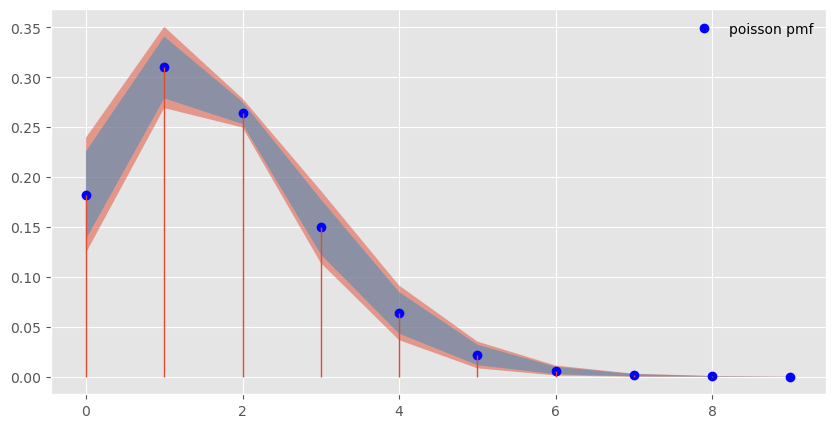

In [157]:
poiss_rv = sts.poisson(x_mean)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = prob_ci(x, alpha= 0.01)
left_1, right_1 = prob_ci(x, alpha= 0.05)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', 
         ms=6, 
         label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.fill_between(x, left_1, right_1, alpha=0.5)

plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [151]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.12395 и 0.23946
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.24971 и 0.27873
Вероятность P(X=3) лежит между  0.11396 и 0.18644
Вероятность P(X=4) лежит между  0.036649 и 0.091422
Вероятность P(X=5) лежит между  0.0084293 и 0.035252
Вероятность P(X=6) лежит между  0.0012388 и 0.011177
Вероятность P(X=7) лежит между  1.9936e-05 и 0.0030047
Вероятность P(X=8) лежит между  -5.5837e-05 и 0.00070061
Вероятность P(X=9) лежит между  -2.1966e-05 и 0.00014414


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [ ]:
df['count'].mean()

In [ ]:
df['count'].var()

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.